# Data Visualization Exercise for Meetup 03/06/19

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [5]:
content = pd.read_csv('C:/Users/gurkaali/Documents/Info/Ben/Data-Challenge/DataViz/Contents.csv')
data = pd.read_csv('C:/Users/gurkaali/Documents/Info/Ben/Data-Challenge/DataViz/Data.csv')

In [6]:
data2 = data[['wordForm','page','totalCount']].groupby(['wordForm','page','totalCount']).size()

In [7]:
data2 = data2.reset_index()
#data2.set_index(['wordForm', 'page'], inplace = True)
data2.rename(columns={0: 'page_word_count'}, inplace=True)

In [8]:
df = pd.merge(data2, content, 
    left_on=['page'],
    right_on=['page'],
    how='left')

In [9]:
df.set_index(['wordForm', 'page'], inplace = True)

In [13]:
df.head()

totalCount  page_word_count section  chapter  \
wordForm page                                                 
ability  4             37                1  ORIGIN        0   
         5             37                1  ORIGIN        0   
         6             37                1  ORIGIN        0   
         10            37                1  ORIGIN        0   
         24            37                1  ORIGIN        2   

                               title  
wordForm page                         
ability  4     THE GOAL OF OUR CRAFT  
         5     THE GOAL OF OUR CRAFT  
         6     THE GOAL OF OUR CRAFT  
         10    THE GOAL OF OUR CRAFT  
         24      INFORMATION MURMURS

In [20]:
comment_words = ''
# iterate through the csv file 
for val in df.title: 
      
    # typecaste each val to string 
    val = str(val) 
    
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '

In [21]:
comment_words

'the goal of our craft the goal of our craft the goal of our craft the goal of our craft information murmurs information murmurs information murmurs information murmurs information murmurs embodied encoding embodied encoding counting time counting time world building world building world building infuse meaning infuse meaning true colors true colors explore to create explore to create explore to create create to explore create to explore uncertain honesty uncertain honesty uncertain honesty make make inspire trust focus attention focus attention data shadows information murmurs information murmurs counting time counting time counting time world building infuse meaning infuse meaning true colors true colors explore to create create to explore uncertain honesty uncertain honesty uncertain honesty uncertain honesty encounter encounter inspire trust focus attention focus attention focus attention creative routines data shadows data shadows data shadows data shadows embodied encoding embodi

In [23]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(comment_words)

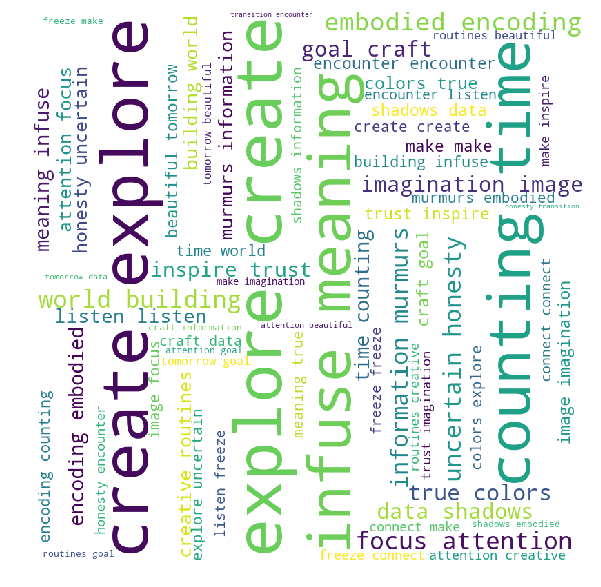

In [28]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

The wordcloud above shows repetitive words. This is because the same words exists both as a single word andpart of a multiple word phrases.
As section names are titles made up of multiple words rather than single words, using word frequencies makes more sense
Use the generate_from_frequencies method

In [50]:
df.groupby('title').size()

title
BEAUTIFUL TOMORROW       169
CONNECT                  259
COUNTING TIME            494
CREATE TO EXPLORE        436
CREATIVE ROUTINES        230
DATA SHADOWS             344
EMBODIED ENCODING        485
ENCOUNTER                337
EXPLORE TO CREATE        385
FOCUS ATTENTION          447
FREEZE                   287
IMAGINATION TO IMAGE     345
INFORMATION MURMURS      417
INFUSE MEANING           495
INSPIRE TRUST            320
LISTEN                   458
MAKE                     349
THE GOAL OF OUR CRAFT    354
TRUE COLORS              378
UNCERTAIN HONESTY        439
WORLD BUILDING           440
[transition]              32
dtype: int64

In [51]:
wordcloud2 = WordCloud(width = 800, height = 800, 
                background_color ='skyblue', 
                min_font_size = 10,
                max_font_size=60,
                colormap="Blues").generate_from_frequencies(df.groupby('title').size())

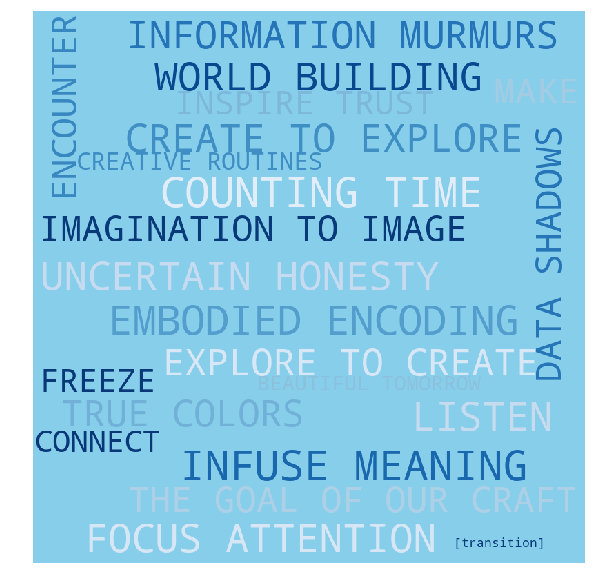

In [49]:
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud2) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 